# KMENSAH_ASSIGNMENT5

In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

import os

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    #confusion_matrix,
    #plot_confusion_matrix,
    make_scorer,
)

In [2]:
# To build a Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# To tune a model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# To get different performance metrics
import sklearn.metrics as metrics
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    recall_score,
    accuracy_score,
    precision_score,
    f1_score,
)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [3]:
#pip install --upgrade scikit-learn

In [4]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Imblearn installation

In [5]:
# Imblearn libary is used to handle imbalanced data

# Jupyter notebook
!pip install imblearn --user

!pip install imbalanced-learn --user

# Anaconda prompt
#!pip install -U imbalanced-learn

#conda install -c conda-forge imbalanced-learn

# Restart the kernel after successful installation of the library

In [6]:
# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Read the dataset

In [7]:
data1 = pd.read_csv("previous_application.csv")

In [8]:
# copying data to another varaible to avoid any changes to original data
previous_app = data1.copy()


In [9]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [10]:
previous_app.shape

(1670214, 37)

In [11]:
# using .tolist makes Python print all columns, instead of using ellipsis
# We could also configure pandas to do the same.
print(previous_app.columns.tolist())

['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


In [12]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# CODE_REJECT_REASON -    Why was the previous application rejected
previous_app['CODE_REJECT_REASON'].value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [14]:
# NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application
previous_app['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

# CREATE DATEFRAME FOR PLOTS AFTER DECIDING ON VARIABLES

In [15]:
data=previous_app

# MISSING VALUE

In [16]:
def missing_values_table(df):
    mis_val = df.isnull().sum()
    
    mis_val_percent = 100*df.isnull().sum() / len(df)
    
    mis_val_table =pd.concat([mis_val, mis_val_percent], axis=1)
    
    mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending = False).round(1)
    
    print('Your selected dataframe has' + str(df.shape[1])+ 'columns.\n'
         "There are" + str(mis_val_table_ren_columns.shape[0])+ 'columns that have missing values.')
    
    return mis_val_table_ren_columns

In [17]:
# missing values check
missing_values = missing_values_table(previous_app)
missing_values.head(20)

Your selected dataframe has37columns.
There are16columns that have missing values.


,Missing Values,% of Total Values
RATE_INTEREST_PRIMARY,1664263,99.6
RATE_INTEREST_PRIVILEGED,1664263,99.6
AMT_DOWN_PAYMENT,895844,53.6
RATE_DOWN_PAYMENT,895844,53.6
NAME_TYPE_SUITE,820405,49.1
DAYS_FIRST_DRAWING,673065,40.3
DAYS_FIRST_DUE,673065,40.3
DAYS_LAST_DUE_1ST_VERSION,673065,40.3
DAYS_LAST_DUE,673065,40.3
DAYS_TERMINATION,673065,40.3


In [18]:
# Number of each type of column
previous_app.dtypes.value_counts()

object     16
float64    15
int64       6
dtype: int64

In [19]:
previous_app.select_dtypes('object').apply(pd.Series.nunique, axis =0)

NAME_CONTRACT_TYPE              4
WEEKDAY_APPR_PROCESS_START      7
FLAG_LAST_APPL_PER_CONTRACT     2
NAME_CASH_LOAN_PURPOSE         25
NAME_CONTRACT_STATUS            4
NAME_PAYMENT_TYPE               4
CODE_REJECT_REASON              9
NAME_TYPE_SUITE                 7
NAME_CLIENT_TYPE                4
NAME_GOODS_CATEGORY            28
NAME_PORTFOLIO                  5
NAME_PRODUCT_TYPE               3
CHANNEL_TYPE                    8
NAME_SELLER_INDUSTRY           11
NAME_YIELD_GROUP                5
PRODUCT_COMBINATION            17
dtype: int64

In [20]:
previous_app['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

# Encoding Categorical Variables

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436

In [21]:
# Label Encode categorical variables
Status = {"Approved": 0, "Canceled": 1,"Refused": 1,"Unused offer": 1}
previous_app["NAME_CONTRACT_STATUS"] = previous_app["NAME_CONTRACT_STATUS"].map(Status)

In [22]:
previous_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,0,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,0,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,0,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,0,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,1,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in previous_app:
    if previous_app[col].dtype == 'object':
        
        if len(list(previous_app[col].unique())) <= 2:
            le.fit(previous_app[col])
        # Transform both training and testing data
            previous_app[col] = le.transform(previous_app[col])
           
        
            le_count +=1
        
print('%d columns were label encoded.' % le_count)

1 columns were label encoded.


In [24]:
previous_app = pd.get_dummies(previous_app)


print('Training Feature shape: ', previous_app.shape)



Training Feature shape:  (1670214, 160)


In [25]:
train_labels =previous_app['NAME_CONTRACT_STATUS']



previous_app['NAME_CONTRACT_STATUS'] =train_labels

print('Training Feature shape: ', previous_app.shape)


Training Feature shape:  (1670214, 160)


In [26]:
correlations = previous_app.corr()['NAME_CONTRACT_STATUS'].sort_values()

print('Most Positive Correlations:\n', correlations.tail(50))
print('\nMost Negative Correlations:\n', correlations.head(50))

Most Positive Correlations:
 NAME_CLIENT_TYPE_XNA                                   0.022704
CHANNEL_TYPE_Channel of corporate sales                0.023808
WEEKDAY_APPR_PROCESS_START_TUESDAY                     0.024323
CODE_REJECT_REASON_SYSTEM                              0.026513
WEEKDAY_APPR_PROCESS_START_MONDAY                      0.026843
NAME_CASH_LOAN_PURPOSE_Buying a used car               0.027079
CHANNEL_TYPE_AP+ (Cash loan)                           0.028400
NAME_CASH_LOAN_PURPOSE_Urgent needs                    0.028723
NAME_CASH_LOAN_PURPOSE_Building a house or an annex    0.030653
NAME_CASH_LOAN_PURPOSE_Payments on other loans         0.032487
PRODUCT_COMBINATION_Cash Street: middle                0.033872
NAME_CASH_LOAN_PURPOSE_Other                           0.038624
SK_ID_PREV                                             0.046699
CODE_REJECT_REASON_VERIF                               0.058920
NAME_CASH_LOAN_PURPOSE_Repairs                         0.063297
CODE_REJECT

# From reviewing the correlations above we selected the independent variables below

In [27]:
loan=previous_app[['SK_ID_CURR','CODE_REJECT_REASON_XAP','NAME_PORTFOLIO_POS','NAME_CONTRACT_TYPE_Consumer loans','CODE_REJECT_REASON_HC','CODE_REJECT_REASON_SYSTEM','NAME_PORTFOLIO_POS','NAME_PORTFOLIO_XNA','NAME_CONTRACT_STATUS']]

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                             Non-Null Count    Dtype
---  ------                             --------------    -----
 0   SK_ID_CURR                         1670214 non-null  int64
 1   CODE_REJECT_REASON_XAP             1670214 non-null  uint8
 2   NAME_PORTFOLIO_POS                 1670214 non-null  uint8
 3   NAME_CONTRACT_TYPE_Consumer loans  1670214 non-null  uint8
 4   CODE_REJECT_REASON_HC              1670214 non-null  uint8
 5   CODE_REJECT_REASON_SYSTEM          1670214 non-null  uint8
 6   NAME_PORTFOLIO_POS                 1670214 non-null  uint8
 7   NAME_PORTFOLIO_XNA                 1670214 non-null  uint8
 8   NAME_CONTRACT_STATUS               1670214 non-null  int64
dtypes: int64(2), uint8(7)
memory usage: 36.6 MB


In [29]:
loan["NAME_CONTRACT_STATUS"].value_counts()

0    1036781
1     633433
Name: NAME_CONTRACT_STATUS, dtype: int64

In [30]:
loan.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_CONTRACT_STATUS
0,271877,1,1,1,0,0,1,0,0
1,108129,1,0,0,0,0,0,0,0
2,122040,1,0,0,0,0,0,0,0
3,176158,1,0,0,0,0,0,0,0
4,202054,0,0,0,1,0,0,0,1


In [31]:
#We Do a Bivariate Analysis and pair plots to gain some additional insights

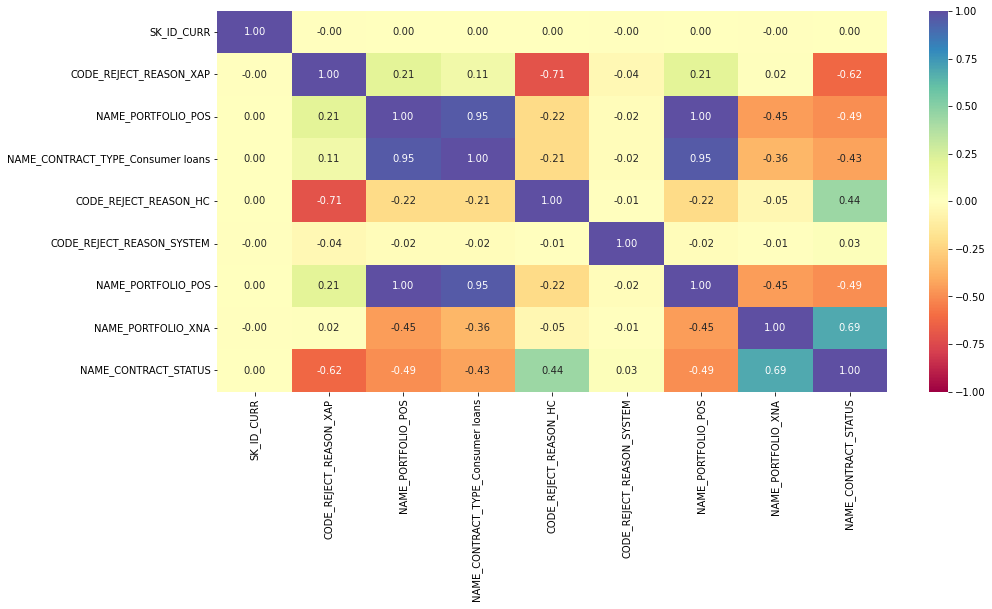

In [32]:
plt.figure(figsize=(15, 7))
sns.heatmap(loan.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [33]:
#Multivariate Analysis

In [34]:
numeric_cols = loan.select_dtypes(include=[np.number]).columns


print("Numeric Columns:    ", numeric_cols)

Numeric Columns:     Index(['SK_ID_CURR', 'CODE_REJECT_REASON_XAP', 'NAME_PORTFOLIO_POS',
       'NAME_CONTRACT_TYPE_Consumer loans', 'CODE_REJECT_REASON_HC',
       'CODE_REJECT_REASON_SYSTEM', 'NAME_PORTFOLIO_POS', 'NAME_PORTFOLIO_XNA',
       'NAME_CONTRACT_STATUS'],
      dtype='object')


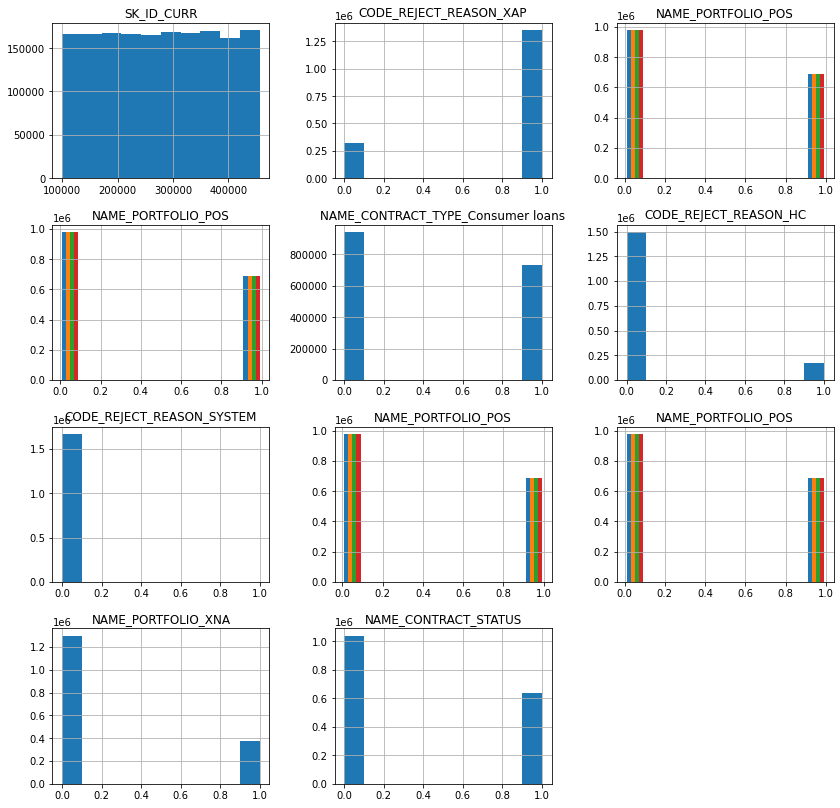

In [35]:
# creating histograms
loan[numeric_cols].hist(figsize=(14, 14))
plt.show()

# Check for missing values on Selected Variables/Columns 

In [36]:
loan.isnull().sum()

SK_ID_CURR                           0
CODE_REJECT_REASON_XAP               0
NAME_PORTFOLIO_POS                   0
NAME_CONTRACT_TYPE_Consumer loans    0
CODE_REJECT_REASON_HC                0
CODE_REJECT_REASON_SYSTEM            0
NAME_PORTFOLIO_POS                   0
NAME_PORTFOLIO_XNA                   0
NAME_CONTRACT_STATUS                 0
dtype: int64

# FINAL SEVEN

From above the Final 7 Variables to be focused on will be:

These 7 were selected because based on research of the domain, strong correlation to Independent Variable and minimal missing values which will require substantial imputation of values.

# Model Building Approach

1. Data preparation
2. Partition the data into train and test set.
3. Build a model on the train data.
4. Tune/Oversample/Undersample the model if required.

In [37]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 9 columns):
 #   Column                             Non-Null Count    Dtype
---  ------                             --------------    -----
 0   SK_ID_CURR                         1670214 non-null  int64
 1   CODE_REJECT_REASON_XAP             1670214 non-null  uint8
 2   NAME_PORTFOLIO_POS                 1670214 non-null  uint8
 3   NAME_CONTRACT_TYPE_Consumer loans  1670214 non-null  uint8
 4   CODE_REJECT_REASON_HC              1670214 non-null  uint8
 5   CODE_REJECT_REASON_SYSTEM          1670214 non-null  uint8
 6   NAME_PORTFOLIO_POS                 1670214 non-null  uint8
 7   NAME_PORTFOLIO_XNA                 1670214 non-null  uint8
 8   NAME_CONTRACT_STATUS               1670214 non-null  int64
dtypes: int64(2), uint8(7)
memory usage: 36.6 MB


In [38]:
# checking for unique values in ID column
loan["SK_ID_CURR"].nunique()

338857

In [39]:
df_train_no_duplicates2 = loan.drop_duplicates(subset=['SK_ID_CURR'])

In [40]:
df_train_no_duplicates2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 338857 entries, 0 to 1670060
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   SK_ID_CURR                         338857 non-null  int64
 1   CODE_REJECT_REASON_XAP             338857 non-null  uint8
 2   NAME_PORTFOLIO_POS                 338857 non-null  uint8
 3   NAME_CONTRACT_TYPE_Consumer loans  338857 non-null  uint8
 4   CODE_REJECT_REASON_HC              338857 non-null  uint8
 5   CODE_REJECT_REASON_SYSTEM          338857 non-null  uint8
 6   NAME_PORTFOLIO_POS                 338857 non-null  uint8
 7   NAME_PORTFOLIO_XNA                 338857 non-null  uint8
 8   NAME_CONTRACT_STATUS               338857 non-null  int64
dtypes: int64(2), uint8(7)
memory usage: 10.0 MB


In [41]:
df_train_no_duplicates2.isnull().sum()

SK_ID_CURR                           0
CODE_REJECT_REASON_XAP               0
NAME_PORTFOLIO_POS                   0
NAME_CONTRACT_TYPE_Consumer loans    0
CODE_REJECT_REASON_HC                0
CODE_REJECT_REASON_SYSTEM            0
NAME_PORTFOLIO_POS                   0
NAME_PORTFOLIO_XNA                   0
NAME_CONTRACT_STATUS                 0
dtype: int64

# TAKE A RANDOM SAMPLE OF 3000 (Do not have enough compute power for the whole population)

In [42]:
loan11=df_train_no_duplicates2.sample(n=3000, random_state=1)

In [43]:
loan11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 737318 to 640910
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   SK_ID_CURR                         3000 non-null   int64
 1   CODE_REJECT_REASON_XAP             3000 non-null   uint8
 2   NAME_PORTFOLIO_POS                 3000 non-null   uint8
 3   NAME_CONTRACT_TYPE_Consumer loans  3000 non-null   uint8
 4   CODE_REJECT_REASON_HC              3000 non-null   uint8
 5   CODE_REJECT_REASON_SYSTEM          3000 non-null   uint8
 6   NAME_PORTFOLIO_POS                 3000 non-null   uint8
 7   NAME_PORTFOLIO_XNA                 3000 non-null   uint8
 8   NAME_CONTRACT_STATUS               3000 non-null   int64
dtypes: int64(2), uint8(7)
memory usage: 90.8 KB


Split Data

In [44]:
# separating the independent and dependent variables

X = loan11.drop(["NAME_CONTRACT_STATUS"], axis=1)
y = loan11["NAME_CONTRACT_STATUS"]

In [45]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA
737318,248439,1,1,1,0,0,1,0
382029,455947,1,0,0,0,0,0,0
65164,130748,1,0,0,0,0,0,0
103459,411314,1,1,1,0,0,1,0
1424460,251033,1,1,1,0,0,1,0


# Splitting the data into X and y

In [46]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(1500, 8) (900, 8) (600, 8)


In [47]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
0    0.761333
1    0.238667
Name: NAME_CONTRACT_STATUS, dtype: float64
********************************************************************************
Target value ratio in y_train
0    0.761333
1    0.238667
Name: NAME_CONTRACT_STATUS, dtype: float64
********************************************************************************
Target value ratio in y_val
0    0.761111
1    0.238889
Name: NAME_CONTRACT_STATUS, dtype: float64
********************************************************************************
Target value ratio in y_test
0    0.761667
1    0.238333
Name: NAME_CONTRACT_STATUS, dtype: float64
********************************************************************************


In [48]:
X_train.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA
73646,442210,1,0,0,0,0,0,0
1141771,313301,1,0,0,0,0,0,0
439582,100687,1,1,1,0,0,1,0
132020,351021,1,1,1,0,0,1,0
4914,429801,1,1,1,0,0,1,0


# Build a Gaussian Naive Bayes Model

In [49]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [50]:
# Predict class labels for X_train
y_pred = gnb.predict(X_train)

In [51]:
# Predict class probabilities for X_train
y_pred_prob = gnb.predict_proba(X_train)



In [52]:
# Create a dataframe with predicted class labels and probabilities
result_df = pd.DataFrame(y_pred_prob, columns=gnb.classes_)
result_df['target'] = y_pred


In [53]:

# Print the resulting dataframe
print(result_df)


             0         1  target
0     0.739159  0.260841       0
1     0.762468  0.237532       0
2     0.782033  0.217967       0
3     0.786854  0.213146       0
4     0.772554  0.227446       0
...        ...       ...     ...
1495  0.755266  0.244734       0
1496  0.764297  0.235703       0
1497  0.773010  0.226990       0
1498  0.762598  0.237402       0
1499  0.786099  0.213901       0

[1500 rows x 3 columns]


In [54]:
y_pred = gnb.predict(X_train)
y_probs = gnb.predict_proba(X_train)

In [55]:
# Predict class labels and probabilities for training data
y_pred = gnb.predict(X_train)
y_probs = gnb.predict_proba(X_train)

# Create a dataframe with original X_train column names and "target" column
result_df = pd.DataFrame(X_train, columns=X_train.columns)
result_df['target'] = y_pred

# Add columns for class probabilities
for i, class_name in enumerate(gnb.classes_):
    result_df[f'prob_{class_name}'] = y_probs[:, i]

# Display the resulting dataframe
print(result_df)


         SK_ID_CURR  CODE_REJECT_REASON_XAP  NAME_PORTFOLIO_POS  \
73646        442210                       1                   0   
1141771      313301                       1                   0   
439582       100687                       1                   1   
132020       351021                       1                   1   
4914         429801                       1                   1   
...             ...                     ...                 ...   
239029       369008                       1                   0   
140153       194348                       1                   0   
907881       427849                       1                   1   
54997        171845                       1                   0   
291656       127058                       1                   1   

         NAME_CONTRACT_TYPE_Consumer loans  CODE_REJECT_REASON_HC  \
73646                                    0                      0   
1141771                                  0               

In [56]:
# Create a dataframe with original X_train column names and "target" column
result_df = pd.DataFrame(X_train, columns=X_train.columns)
result_df['target'] = y_pred

# Add columns for class probabilities
for i, class_name in enumerate(gnb.classes_):
    result_df[f'prob_{class_name}'] = y_probs[:, i]

# Display the resulting dataframe
print(result_df)


         SK_ID_CURR  CODE_REJECT_REASON_XAP  NAME_PORTFOLIO_POS  \
73646        442210                       1                   0   
1141771      313301                       1                   0   
439582       100687                       1                   1   
132020       351021                       1                   1   
4914         429801                       1                   1   
...             ...                     ...                 ...   
239029       369008                       1                   0   
140153       194348                       1                   0   
907881       427849                       1                   1   
54997        171845                       1                   0   
291656       127058                       1                   1   

         NAME_CONTRACT_TYPE_Consumer loans  CODE_REJECT_REASON_HC  \
73646                                    0                      0   
1141771                                  0               

In [57]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 73646 to 291656
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         1500 non-null   int64  
 1   CODE_REJECT_REASON_XAP             1500 non-null   uint8  
 2   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 3   NAME_CONTRACT_TYPE_Consumer loans  1500 non-null   uint8  
 4   CODE_REJECT_REASON_HC              1500 non-null   uint8  
 5   CODE_REJECT_REASON_SYSTEM          1500 non-null   uint8  
 6   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 7   NAME_PORTFOLIO_XNA                 1500 non-null   uint8  
 8   target                             1500 non-null   int64  
 9   prob_0                             1500 non-null   float64
 10  prob_1                             1500 non-null   float64
dtypes: float64(2), int64(2), uint8(7)
memory usage: 68

In [58]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 73646 to 291656
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         1500 non-null   int64  
 1   CODE_REJECT_REASON_XAP             1500 non-null   uint8  
 2   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 3   NAME_CONTRACT_TYPE_Consumer loans  1500 non-null   uint8  
 4   CODE_REJECT_REASON_HC              1500 non-null   uint8  
 5   CODE_REJECT_REASON_SYSTEM          1500 non-null   uint8  
 6   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 7   NAME_PORTFOLIO_XNA                 1500 non-null   uint8  
 8   target                             1500 non-null   int64  
 9   prob_0                             1500 non-null   float64
 10  prob_1                             1500 non-null   float64
dtypes: float64(2), int64(2), uint8(7)
memory usage: 68

In [59]:
result_df1=result_df[['SK_ID_CURR','target','prob_0','prob_1']].copy()

In [60]:
result_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 73646 to 291656
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SK_ID_CURR  1500 non-null   int64  
 1   target      1500 non-null   int64  
 2   prob_0      1500 non-null   float64
 3   prob_1      1500 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 58.6 KB


In [61]:
#loan12['NAME_CONTRACT_STATUS'].value_counts()
result_df1['target'].value_counts()

0    1500
Name: target, dtype: int64

# BRING in application_train csv

In [62]:
data1 = pd.read_csv("application_train.csv")

In [63]:
app_train1 = data1.copy()

In [64]:
app_train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


# MERGE

In [65]:
app_train6=pd.merge(loan11, result_df1, on = "SK_ID_CURR", how = "right")

In [66]:
app_train6.shape

(1500, 12)

In [67]:
app_train6.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_CONTRACT_STATUS,target,prob_0,prob_1
0,442210,1,0,0,0,0,0,0,0,0,0.739159,0.260841
1,313301,1,0,0,0,0,0,0,0,0,0.762468,0.237532
2,100687,1,1,1,0,0,1,0,0,0,0.782033,0.217967
3,351021,1,1,1,0,0,1,0,0,0,0.786854,0.213146
4,429801,1,1,1,0,0,1,0,0,0,0.772554,0.227446


# PAUSE, USE THE RIGHT DATAFRAME

In [68]:
app_train6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         1500 non-null   int64  
 1   CODE_REJECT_REASON_XAP             1500 non-null   uint8  
 2   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 3   NAME_CONTRACT_TYPE_Consumer loans  1500 non-null   uint8  
 4   CODE_REJECT_REASON_HC              1500 non-null   uint8  
 5   CODE_REJECT_REASON_SYSTEM          1500 non-null   uint8  
 6   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 7   NAME_PORTFOLIO_XNA                 1500 non-null   uint8  
 8   NAME_CONTRACT_STATUS               1500 non-null   int64  
 9   target                             1500 non-null   int64  
 10  prob_0                             1500 non-null   float64
 11  prob_1                             1500 non-null   float

In [69]:
loan11.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_CONTRACT_STATUS
737318,248439,1,1,1,0,0,1,0,0
382029,455947,1,0,0,0,0,0,0,0
65164,130748,1,0,0,0,0,0,0,0
103459,411314,1,1,1,0,0,1,0,0
1424460,251033,1,1,1,0,0,1,0,0


In [70]:
result_df1.head()

,SK_ID_CURR,target,prob_0,prob_1
73646,442210,0,0.739159,0.260841
1141771,313301,0,0.762468,0.237532
439582,100687,0,0.782033,0.217967
132020,351021,0,0.786854,0.213146
4914,429801,0,0.772554,0.227446


In [71]:
loan11.shape

(3000, 9)

In [72]:
result_df1.shape

(1500, 4)

In [73]:
app_train6.shape

(1500, 12)

In [74]:
app_train6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         1500 non-null   int64  
 1   CODE_REJECT_REASON_XAP             1500 non-null   uint8  
 2   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 3   NAME_CONTRACT_TYPE_Consumer loans  1500 non-null   uint8  
 4   CODE_REJECT_REASON_HC              1500 non-null   uint8  
 5   CODE_REJECT_REASON_SYSTEM          1500 non-null   uint8  
 6   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 7   NAME_PORTFOLIO_XNA                 1500 non-null   uint8  
 8   NAME_CONTRACT_STATUS               1500 non-null   int64  
 9   target                             1500 non-null   int64  
 10  prob_0                             1500 non-null   float64
 11  prob_1                             1500 non-null   float

In [75]:
loan12=app_train6.copy()

In [76]:
loan12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SK_ID_CURR                         1500 non-null   int64  
 1   CODE_REJECT_REASON_XAP             1500 non-null   uint8  
 2   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 3   NAME_CONTRACT_TYPE_Consumer loans  1500 non-null   uint8  
 4   CODE_REJECT_REASON_HC              1500 non-null   uint8  
 5   CODE_REJECT_REASON_SYSTEM          1500 non-null   uint8  
 6   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 7   NAME_PORTFOLIO_XNA                 1500 non-null   uint8  
 8   NAME_CONTRACT_STATUS               1500 non-null   int64  
 9   target                             1500 non-null   int64  
 10  prob_0                             1500 non-null   float64
 11  prob_1                             1500 non-null   float

# Now continue from Assignment 4 with RANDOM FOREST

In [77]:
loan12.head()

,SK_ID_CURR,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,NAME_CONTRACT_STATUS,target,prob_0,prob_1
0,442210,1,0,0,0,0,0,0,0,0,0.739159,0.260841
1,313301,1,0,0,0,0,0,0,0,0,0.762468,0.237532
2,100687,1,1,1,0,0,1,0,0,0,0.782033,0.217967
3,351021,1,1,1,0,0,1,0,0,0,0.786854,0.213146
4,429801,1,1,1,0,0,1,0,0,0,0.772554,0.227446


In [78]:
loan12['NAME_CONTRACT_STATUS'].value_counts()

0    1142
1     358
Name: NAME_CONTRACT_STATUS, dtype: int64

# SPLITTING

Before modelling we drop the SK_ID_CURR

In [79]:
loan12=loan12.drop(["SK_ID_CURR"], axis=1)

In [80]:
loan12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   CODE_REJECT_REASON_XAP             1500 non-null   uint8  
 1   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 2   NAME_CONTRACT_TYPE_Consumer loans  1500 non-null   uint8  
 3   CODE_REJECT_REASON_HC              1500 non-null   uint8  
 4   CODE_REJECT_REASON_SYSTEM          1500 non-null   uint8  
 5   NAME_PORTFOLIO_POS                 1500 non-null   uint8  
 6   NAME_PORTFOLIO_XNA                 1500 non-null   uint8  
 7   NAME_CONTRACT_STATUS               1500 non-null   int64  
 8   target                             1500 non-null   int64  
 9   prob_0                             1500 non-null   float64
 10  prob_1                             1500 non-null   float64
dtypes: float64(2), int64(2), uint8(7)
memory usage: 68.8 KB


In [81]:
# separating the independent and dependent variables

X = loan12.drop(["NAME_CONTRACT_STATUS"], axis=1)
y = loan12["NAME_CONTRACT_STATUS"]

In [82]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

,CODE_REJECT_REASON_XAP,NAME_PORTFOLIO_POS,NAME_CONTRACT_TYPE_Consumer loans,CODE_REJECT_REASON_HC,CODE_REJECT_REASON_SYSTEM,NAME_PORTFOLIO_POS,NAME_PORTFOLIO_XNA,target,prob_0,prob_1
0,1,0,0,0,0,0,0,0,0.739159,0.260841
1,1,0,0,0,0,0,0,0,0.762468,0.237532
2,1,1,1,0,0,1,0,0,0.782033,0.217967
3,1,1,1,0,0,1,0,0,0.786854,0.213146
4,1,1,1,0,0,1,0,0,0.772554,0.227446


In [83]:
# Splitting data into training, validation and test set:

# first we split data into 2 parts, say temporary and test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.5, random_state=0, stratify=y
)

# then we split the temporary set into train and validation
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.4, random_state=0, stratify=y_temp
)

print(X_train.shape, X_val.shape, X_test.shape)

(750, 10) (450, 10) (300, 10)


In [84]:
# Checking class balance for whole data, train set, validation set, and test set

print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
0    0.761333
1    0.238667
Name: NAME_CONTRACT_STATUS, dtype: float64
********************************************************************************
Target value ratio in y_train
0    0.761333
1    0.238667
Name: NAME_CONTRACT_STATUS, dtype: float64
********************************************************************************
Target value ratio in y_val
0    0.762222
1    0.237778
Name: NAME_CONTRACT_STATUS, dtype: float64
********************************************************************************
Target value ratio in y_test
0    0.76
1    0.24
Name: NAME_CONTRACT_STATUS, dtype: float64
********************************************************************************


# RANDOM FOREST

Let's first build a model with default parameters and see it's performance

In [85]:
# model without hyperparameter tuning
rf = RandomForestClassifier(random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

# Let's check model's performance

In [87]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf.predict(X_train)))
print(recall_score(y_val, rf.predict(X_val)))
print("")

# Checking Precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, rf.predict(X_train)))
print(precision_score(y_val, rf.predict(X_val)))

print("")

# Checking Accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, rf.predict(X_train)))
print(accuracy_score(y_val, rf.predict(X_val)))

Recall on train and validation set
1.0
0.9906542056074766

Precision on train and validation set
1.0
0.9814814814814815

Accuracy on train and validation set
1.0
0.9933333333333333


# Hyperparameter Tuning

Grid Search CV


Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on the specific parameter values of a model. The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

# How to know the hyperparameters available for an algorithm?

In [90]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We can see the names of hyperparameters available and their default values.

We can choose which ones to tune.

In [91]:
print(np.arange(0.2, 0.7, 0.1))

print(np.arange(5,10))

[0.2 0.3 0.4 0.5 0.6]
[5 6 7 8 9]


# Let's tune Random forest using Grid Search

In [92]:
%%time

# Choose the type of classifier. 
rf1 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1),
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "max_depth":np.arange(3,4,5),
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(rf1, parameters, scoring=acc_scorer, cv=5, n_jobs= -1, verbose = 2)
# verbose = 2 tells about the number of fits, which can give an idea of how long will the model take in tuning
# n_jobs = -1 so that all CPU cores can be run parallelly to optimize the Search

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 1800 candidates, totalling 9000 fits
Wall time: 17min 34s


{'class_weight': 'balanced',
 'max_depth': 3,
 'max_features': 0.4000000000000001,
 'max_samples': 0.6000000000000001,
 'min_impurity_decrease': 0.001,
 'min_samples_leaf': 5,
 'n_estimators': 150}

Let's check the best CV score, for the obtained parameters

In [93]:
grid_obj.best_score_

0.9888888888888889

Let's build a model with obtained best parameter

We are hard coding the hyperparameters separately so that we don't have to run the grid search again.

In [94]:
# Set the clf to the best combination of parameters
rf1_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.2,
    max_samples=0.6000000000000001,
    min_samples_leaf=5,
    n_estimators=150,
    max_depth=3,
    random_state=1,
    min_impurity_decrease=0.001,
)

# Fit the best algorithm to the data.
rf1_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.6000000000000001,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       n_estimators=150, random_state=1)

Let's check the model's performance

In [95]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf1_tuned.predict(X_train)))
print(recall_score(y_val, rf1_tuned.predict(X_val)))
print("")

# Checking precision score on train and validation set
print("Precision on train and validation set")
print(precision_score(y_train, rf1_tuned.predict(X_train)))
print(precision_score(y_val, rf1_tuned.predict(X_val)))
print("")

# Checking accuracy score on train and validation set
print("Accuracy on train and validation set")
print(accuracy_score(y_train, rf1_tuned.predict(X_train)))
print(accuracy_score(y_val, rf1_tuned.predict(X_val)))

Recall on train and validation set
0.9832402234636871
0.9906542056074766

Precision on train and validation set
0.8301886792452831
0.7412587412587412

Accuracy on train and validation set
0.948
0.9155555555555556


# Randomized Search CV

Random search is a tuning technique that attempts to compute the optimum values of hyperparameters randomly unlike grid search

# Let's tune Random forest using Randomized Search

In [96]:
%%time

# Choose the type of classifier. 
rf2 = RandomForestClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {"n_estimators": [150,200,250],
    "min_samples_leaf": np.arange(5, 10),
    "max_features": np.arange(0.2, 0.7, 0.1), 
    "max_samples": np.arange(0.3, 0.7, 0.1),
    "max_depth":np.arange(3,4,5),
    "class_weight" : ['balanced', 'balanced_subsample'],
    "min_impurity_decrease":[0.001, 0.002, 0.003]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the random search
grid_obj = RandomizedSearchCV(rf2, parameters,n_iter=30, scoring=acc_scorer,cv=5, random_state = 1, n_jobs = -1, verbose = 2)
# using n_iter = 30, so randomized search will try 30 different combinations of hyperparameters
# by default, n_iter = 10

grid_obj = grid_obj.fit(X_train, y_train)

# Print the best combination of parameters
grid_obj.best_params_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Wall time: 13.5 s


{'n_estimators': 150,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.002,
 'max_samples': 0.6000000000000001,
 'max_features': 0.4000000000000001,
 'max_depth': 3,
 'class_weight': 'balanced_subsample'}

Let's check the best CV score, for the obtained parameters

In [97]:
grid_obj.best_score_

0.9888888888888889

In [98]:
# Set the clf to the best combination of parameters
rf2_tuned = RandomForestClassifier(
    class_weight="balanced",
    max_features=0.2,
    max_samples=0.5,
    min_samples_leaf=5,
    n_estimators=150,
    random_state=1,
    max_depth=3,
    min_impurity_decrease=0.003,
)

# Fit the best algorithm to the data.
rf2_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, max_features=0.2,
                       max_samples=0.5, min_impurity_decrease=0.003,
                       min_samples_leaf=5, n_estimators=150, random_state=1)

Let's check the model's performance

In [99]:
# Checking recall score on train and validation set
print("Recall on train and validation set")
print(recall_score(y_train, rf2_tuned.predict(X_train)))
print(recall_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Precision on train and validation set")
# Checking precision score on train and validation set
print(precision_score(y_train, rf2_tuned.predict(X_train)))
print(precision_score(y_val, rf2_tuned.predict(X_val)))
print("")
print("Accuracy on train and validation set")
# Checking accuracy score on train and validation set
print(accuracy_score(y_train, rf2_tuned.predict(X_train)))
print(accuracy_score(y_val, rf2_tuned.predict(X_val)))

Recall on train and validation set
0.9385474860335196
0.9345794392523364

Precision on train and validation set
0.8235294117647058
0.7299270072992701

Accuracy on train and validation set
0.9373333333333334
0.9022222222222223


# Choose a best model and predict the performance on the test set

In [100]:
model = rf1_tuned

In [101]:
# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, model.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, model.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, model.predict(X_test)))

Recall on test set
0.9583333333333334

Precision on test set
0.7840909090909091

Accuracy on test set
0.9266666666666666


In [102]:
model2 = rf2_tuned

In [103]:
# Checking recall score on test set
print("Recall on test set")
print(recall_score(y_test, model2.predict(X_test)))
print("")

# Checking precision score on test set
print("Precision on test set")
print(precision_score(y_test, model2.predict(X_test)))
print("")

# Checking accuracy score on test set
print("Accuracy on test set")
print(accuracy_score(y_test, model2.predict(X_test)))

Recall on test set
0.9027777777777778

Precision on test set
0.7738095238095238

Accuracy on test set
0.9133333333333333
